In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import scipy.sparse
import random
import tensorflow as tf

In [2]:
''' load dataset from sklearn '''
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1(shuffle=True)# change arrangment of sample randomly 

In [3]:
N_SAMPLES = 12000 
from sklearn.utils import resample
X1, y1 = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)
X1 = X1.toarray()
y1 = y1.toarray()

In [ ]:
!pip3 install susi

# **SUSI SOM**

In [5]:
import susi

# initialize and fit SOM
som = susi.SOMClustering(n_rows=25,n_columns=25,n_iter_unsupervised =1000,learning_rate_start=0.5)
                         
som.fit(X1)

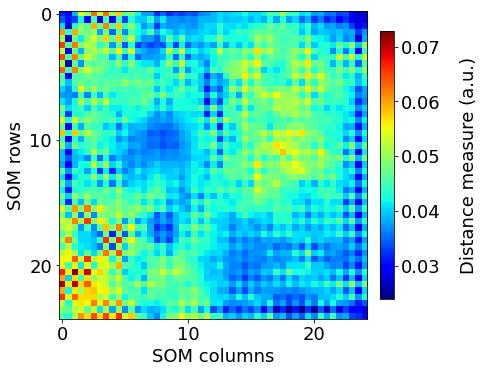

In [6]:
from susi.SOMPlots import plot_estimation_map,plot_nbh_dist_weight_matrix,plot_som_histogram,plot_umatrix
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 25, 25, cmap="jet")
plt.show()

In [7]:
clusters = som.get_clusters(X1)

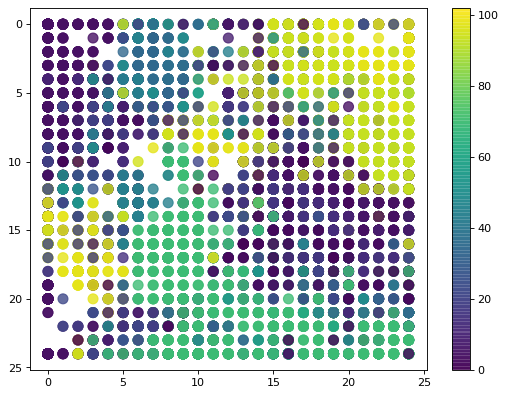

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=np.argmax(y1, axis=1), alpha=0.8,s=80)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()